# Model for Nature Conservancy Fisheries Kaggle Competition

#### Dependencies

In [1]:
import fish_data as fd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import os

#### Helper functions

In [2]:
help(fd)

Help on module fish_data:

NAME
    fish_data

DESCRIPTION
    fish_data module contains the helper functions for the model build of the
    Nature Conservancy Fisheries Kaggle Competition.
    
    Dependencies:
        * numpy as np
        * os
        * scipy.ndimage as ndimage
        * scipy.misc as misc

FUNCTIONS
    count_nodes(std_y, std_x, pool_steps, final_depth)
        Calculates the number of flattened nodes after a number of 'VALID' pool
        steps of strides = [1,2,2,1]
    
    generate_epoch_set_list_and_label_array(min_each)
        Function to generate a list of filenames to be used for each training epoch
        with a corresponding label array.  Most file names will be used  multiple  times
        in order that each fish is drawn into a training batch an equivalent number of
        times.
    
    make_batch(filename_list, offset, batch_size, std_y, std_x, mutate=True)
        Iterates through a filename list to load an RGB image of any pixel
        dimens

#### Generate the list of filenames for balanced training batch collections with corresponding label array

In [3]:
min_each = 2000
pre_X, pre_y = fd.generate_epoch_set_list_and_label_array(min_each)

'ALB' set contains 2000 filenames from which to sample
'BET' set contains 2000 filenames from which to sample
'DOL' set contains 2000 filenames from which to sample
'LAG' set contains 2000 filenames from which to sample
'NoF' set contains 2000 filenames from which to sample
'OTHER' set contains 2000 filenames from which to sample
'SHARK' set contains 2000 filenames from which to sample
'YFT' set contains 2000 filenames from which to sample

Tests
     Master list of filenames contains 8 * min_each filenames: True
     Label is assigned only once per row entry: True
     There are 'min_each' labels for each fish column: True


#### Split into training and validation sets

In [4]:
valid_size = 200
X_train_filenames, X_valid_filenames, y_train, y_valid = train_test_split(pre_X, pre_y, test_size = valid_size)

In [5]:
print("File names in 'X_train_filenames: {}".format(len(X_train_filenames)))
print("Shape of y_train: {}".format(y_train.shape))
print("File names in 'X_valid_filenames: {}".format(len(X_valid_filenames)))
print("Shape of y_valid: {}".format(y_valid.shape))



File names in 'X_train_filenames: 15800
Shape of y_train: (15800, 8)
File names in 'X_valid_filenames: 200
Shape of y_valid: (200, 8)


#### Set the master standardize parameters

In [6]:
std_y = 350
std_x = 580
print("Aspect ratio: {}".format(std_x/std_y))

Aspect ratio: 1.6571428571428573


#### Download and standardize the validation image set into the environment.

In [7]:
X_test = fd.make_batch(X_valid_filenames, len(X_valid_filenames)-2, 4, std_y, std_x) #make_batch to straddle the end of epoch
print("Fn `make_batch` spans the end of an epoch correctly: {}".format(X_test.shape == (4,std_y, std_x, 3)))
y_test = fd.make_label(y_valid, y_valid.shape[0]-2,4)
print("Fn `make_label` spans the end of an epoch correctly: {}".format(y_test.shape == (4, 8)))

Fn `make_batch` spans the end of an epoch correctly: True
Fn `make_label` spans the end of an epoch correctly: True


In [9]:

X_valid = fd.make_batch(X_valid_filenames, 0, len(X_valid_filenames), std_y, std_x)

TEST
  Shape of validation array is correct: True
  Average pixel value: -0.11525094509124756


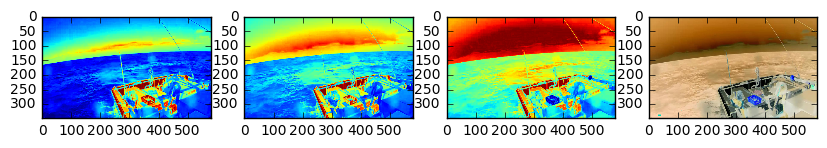

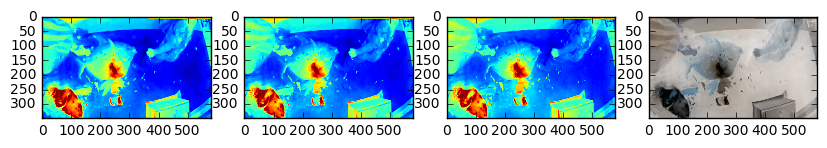

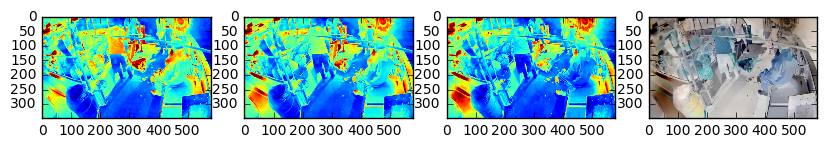

In [10]:
print("TEST")
print("  Shape of validation array is correct: {}".format(X_valid.shape == (valid_size, std_y, std_x, 3)))
print("  Average pixel value: {}".format(np.mean(X_valid)))

for i in range(3) :
    plt.figure(figsize=(10,20))
    plt.subplot(1,4,1)
    plt.imshow(X_valid[i][:,:,0])
    plt.subplot(1,4,2)
    plt.imshow(X_valid[i][:,:,1])
    plt.subplot(1,4,3)
    plt.imshow(X_valid[i][:,:,2])
    plt.subplot(1,4,4)
    plt.imshow( ((X_valid[i]*255.0) + (255.0/2)).astype(int))
    plt.show()

## Graph and Session Runs

#### Graph parameters

In [11]:
# General
num_channels = 3
num_labels = 8
batch_size = 25
stddev = 0.1

# convolution
kernel_sizes = [1, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2]
stride = 1
conv_depths = [3, 6] + [9*x for x in range(1,(len(kernel_sizes)-1))]
final_depth = conv_depths[-1]
#print(fd.count_nodes(std_y, std_x, pool_steps = 7, final_depth = final_depth))

#dropout
kp_convs = 1
kp_hidden = 0.9

# fully connected
fc1_depth = 256
fc2_depth = 64

# Learning rate
init_rate = 5e-2
per_steps = y_train.shape[0]   #each 1/4 epoch
decay_rate = 0.95

In [12]:
%run -i 'GRAPH.py'

#### Session parameters

In [13]:
# epochs
num_epochs = 10
# path for tensorboard summary file to be written
logs_path = os.getcwd()+'/TB_logs'
valid_every = 20

In [17]:
%run -i 'SESSION.py'

Initialized!


Run the command line:
tensorboard --logdir='/Users/ccthomps/Documents/Python Files/Kaggle Competitions/Nature Conservancy Fisheries/TB_logs'

 to view your tensorboard dashboard summary!
1
2
3
4
5
6
7
8
record switched to false
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
record switch to True
29
30
31
32
33
34
35
36
record switched to false
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
record switch to True
57


KeyboardInterrupt: 